In [4]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
X_cluster_data = np . array ([[2 , 10] , [2 , 5] , [8 , 4] , [5 , 8] , [7 , 5] , [6 , 4] , [1 , 2] , [4 , 9] ])

In [ ]:
from scipy.spatial.distance import euclidean

C1 = np.array([2, 10])
C2 = np.array([2, 5])

assignments = []
for idx, point in enumerate(X_cluster_data):
    d1 = euclidean(point, C1)
    d2 = euclidean(point, C2)
    cluster = 1 if d1 < d2 else 2
    assignments.append(cluster)
    print(f"Point {idx} {point} -> Cluster {cluster} (d1={d1:.2f}, d2={d2:.2f})")
    print(np.mean([[2,10], [5,8], [4,9]], axis=0))
    print(np.mean([[2,5], [8,4], [7,5], [6,4], [1,2]], axis=0))
    

Point 0 [ 2 10] -> Cluster 1 (d1=0.00, d2=5.00)
Point 1 [2 5] -> Cluster 2 (d1=5.00, d2=0.00)
Point 2 [8 4] -> Cluster 2 (d1=8.49, d2=6.08)
Point 3 [5 8] -> Cluster 1 (d1=3.61, d2=4.24)
Point 4 [7 5] -> Cluster 2 (d1=7.07, d2=5.00)
Point 5 [6 4] -> Cluster 2 (d1=7.21, d2=4.12)
Point 6 [1 2] -> Cluster 2 (d1=8.06, d2=3.16)
Point 7 [4 9] -> Cluster 1 (d1=2.24, d2=4.47)


In [12]:
km=KMeans(n_clusters=3)
km.fit(X_cluster_data)
centers = km.cluster_centers_
labels=km.labels_

print("Final centroids (Scikit-learn):\n", centers)
print("Cluster labels:\n", labels)
print("Labels shape",labels.shape)
print("First 5 labels", labels[:5])

Final centroids (Scikit-learn):
 [[7.         4.33333333]
 [3.66666667 9.        ]
 [1.5        3.5       ]]
Cluster labels:
 [1 2 0 1 0 0 2 1]
Labels shape (8,)
First 5 labels [1 2 0 1 0]


In [13]:
C1_new = np.array([3.67, 9.0])
C2_new = np.array([4.8, 4.0])

assignments_iter2 = []
for idx, point in enumerate(X_cluster_data):
    d1 = euclidean(point, C1_new)
    d2 = euclidean(point, C2_new)
    cluster = 1 if d1 < d2 else 2
    assignments_iter2.append(cluster)
    print(f"Point {idx} {point} -> Cluster {cluster} (d1={d1:.2f}, d2={d2:.2f})")

Point 0 [ 2 10] -> Cluster 1 (d1=1.95, d2=6.62)
Point 1 [2 5] -> Cluster 2 (d1=4.33, d2=2.97)
Point 2 [8 4] -> Cluster 2 (d1=6.61, d2=3.20)
Point 3 [5 8] -> Cluster 1 (d1=1.66, d2=4.00)
Point 4 [7 5] -> Cluster 2 (d1=5.20, d2=2.42)
Point 5 [6 4] -> Cluster 2 (d1=5.52, d2=1.20)
Point 6 [1 2] -> Cluster 2 (d1=7.49, d2=4.29)
Point 7 [4 9] -> Cluster 1 (d1=0.33, d2=5.06)


In [ ]:
km=KMeans(n_clusters=3)
km.fit(X_cluster_data)
centers = km.cluster_centers_
labels=km.labels_

print("Final centroids (Scikit-learn):\n", centers)
print("Cluster labels:\n", labels)
print("Labels shape",labels.shape)
print("First 5 labels", labels[:5])

Final centroids (Scikit-learn):
 [[7.         4.33333333]
 [3.66666667 9.        ]
 [1.5        3.5       ]]
Cluster labels:
 [1 2 0 1 0 0 2 1]
Labels shape (8,)
First 5 labels [1 2 0 1 0]


/var/folders/vs/gb3t5vwd3hx4p60jqd98hnlw0000gn/T/ipykernel_54915/4060328962.py:4: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('tab10', num_clusters)


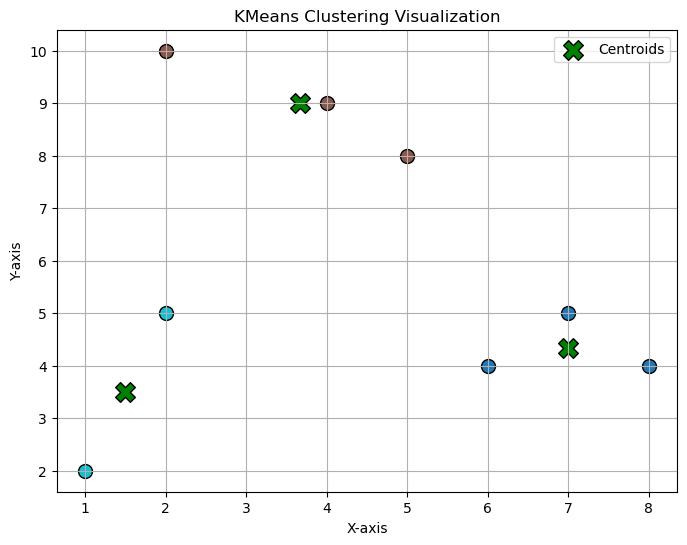

In [28]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
num_clusters = len(np.unique(labels))
cmap = cm.get_cmap('tab10', num_clusters)

plt.figure(figsize=(8, 6))
for i in range(len(X_cluster_data)):
    plt.scatter(X_cluster_data[i][0], X_cluster_data[i][1],
                color=cmap(labels[i]), s=100, edgecolor='black')

plt.scatter(centers[:, 0], centers[:, 1],
            marker='X', s=200, color='green', edgecolor='black', label='Centroids')

plt.title('KMeans Clustering Visualization')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend()
plt.grid(True)
plt.show()